In [5]:
# Install required packages (if not already installed)
!pip install -q pandas scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
# Sample dataset simulating employee experience, education, job level and salary
data = {
    'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                   1, 3, 5, 7, 9, 2, 4, 6, 8, 10],
    'Education_Level': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                        1, 0, 1, 0, 1, 1, 0, 1, 0, 1],  # 0: Bachelor's, 1: Master's
    'Job_Level': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5,
                  1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Salary': [30000, 35000, 40000, 45000, 50000,
               60000, 65000, 70000, 75000, 80000,
               33000, 41000, 52000, 66000, 82000,
               36000, 44000, 58000, 72000, 85000]
}

df = pd.DataFrame(data)
df.head()


,Experience,Education_Level,Job_Level,Salary
0,1,0,1,30000
1,2,1,1,35000
2,3,0,2,40000
3,4,1,2,45000
4,5,0,3,50000


       Experience  Education_Level  Job_Level       Salary
count   20.000000        20.000000  20.000000     20.00000
mean     5.500000         0.550000   3.000000  55950.00000
std      2.946898         0.510418   1.450953  17697.68049
min      1.000000         0.000000   1.000000  30000.00000
25%      3.000000         0.000000   2.000000  40750.00000
50%      5.500000         1.000000   3.000000  55000.00000
75%      8.000000         1.000000   4.000000  70500.00000
max     10.000000         1.000000   5.000000  85000.00000


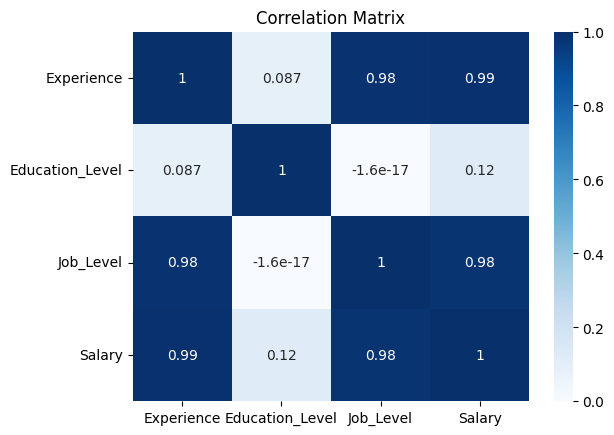

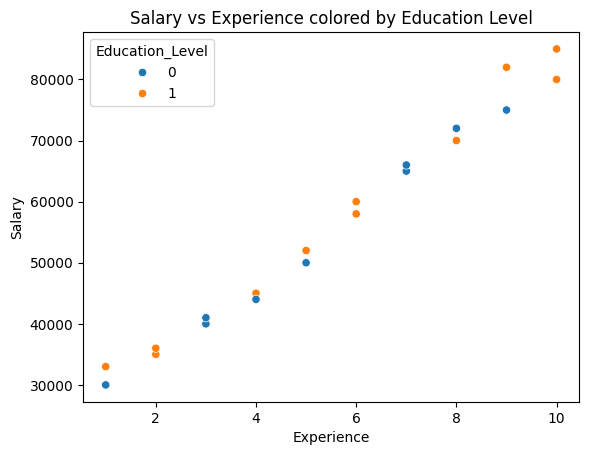

In [7]:
# Basic statistics
print(df.describe())

# Visualizing correlations
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

# Salary vs Experience
sns.scatterplot(x='Experience', y='Salary', hue='Education_Level', data=df)
plt.title("Salary vs Experience colored by Education Level")
plt.show()



In [8]:
# Features and Target
X = df[['Experience', 'Education_Level', 'Job_Level']]
y = df['Salary']

# Split the dataset into Train and Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)


In [10]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)


In [11]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("MAE :", round(mean_absolute_error(y_true, y_pred), 2))
    print("MSE :", round(mean_squared_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("R² Score:", round(r2_score(y_true, y_pred), 4))

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)



Model: Linear Regression
MAE : 1150.17
MSE : 1578278.58
RMSE: 1256.3
R² Score: 0.9864

Model: Random Forest
MAE : 2379.37
MSE : 13191510.94
RMSE: 3632.01
R² Score: 0.8865


In [12]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Salary': y_test.values,
    'Predicted (Linear)': lr_pred,
    'Predicted (RandomForest)': rf_pred
})
comparison_df = comparison_df.reset_index(drop=True)
comparison_df


,Actual Salary,Predicted (Linear),Predicted (RandomForest)
0,30000,28239.897134,37062.5
1,58000,58816.311536,56545.0
2,36000,34487.876561,35867.5
3,35000,34487.876561,35867.5


In [13]:
# Example: Predict for a new employee
# Experience: 6 years, Master's degree (1), Job Level 3
new_employee = pd.DataFrame({
    'Experience': [6],
    'Education_Level': [1],
    'Job_Level': [3]
})

predicted_salary = rf_model.predict(new_employee)[0]
print(f"\nPredicted Salary for new employee: ₹{predicted_salary:.2f}")



Predicted Salary for new employee: ₹56545.00
